In [1]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from hypopt import GridSearch

from umap import UMAP

In [2]:
model_path = "/neurospin/dico/jchavas/Runs/70_self-supervised_two-regions/Output/ORBITAL_BT/20-56-02_2"
ukb_emb_file = f"{model_path}/ukb_random_embeddings/full_embeddings.csv"
schiz_emb_file = f"{model_path}/schiz_extended_random_embeddings/full_embeddings.csv"
schiz_path = "/neurospin/dico/data/deep_folding/current/datasets/schiz_extended"
schiz_label_file = f"{schiz_path}/used_schiz_subjects.csv"
train_file = f"{schiz_path}/train_subjects.csv"
val_file = f"{schiz_path}/val_subjects.csv"
test_intra_file = f"{schiz_path}/test_intra_subjects.csv"
test_file = f"{schiz_path}/test_subjects.csv"
precatatoes_file = "/neurospin/dico/data/bv_databases/human/partially_labeled/orbital_patterns/PreCatatoes/OFC_sulcal_type_data_186-subjects_only-schiz-and-control.csv"

In [3]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,1.497522,-17.298222,-7.023603,-11.205885,14.206353,-8.073137,12.077803,1.188005,-21.182160,12.422483,...,-0.782009,-13.568072,11.335606,27.711756,1.055951,16.339926,-6.282044,17.143698,-42.953117,-9.542476
sub-1000458,-3.609246,11.989327,3.261152,-24.368643,17.229946,-15.242127,18.376665,5.099380,-12.348334,1.510425,...,-5.986905,5.410737,-0.495618,18.814777,-1.137268,-2.769095,-3.145500,-1.589806,-26.272230,19.650710
sub-1000575,9.973359,-0.526970,-16.491266,-6.800225,13.853608,-1.892061,12.505042,25.941790,20.332819,6.928286,...,-10.767097,8.413599,1.047728,5.613638,4.589878,5.264478,-3.590338,-26.656113,3.834120,-3.502216
sub-1000606,38.929436,5.370797,8.908671,10.817114,-36.351353,5.951402,-3.859577,19.411158,-6.009777,8.619954,...,-10.831139,4.726006,-3.820110,15.025682,16.366623,-1.969968,30.462904,10.683294,9.435775,28.027756
sub-1000963,36.624977,6.796172,28.739016,-24.772793,-1.008246,-18.348162,12.348809,0.414275,-4.930811,8.232450,...,-3.167979,20.949572,14.828034,14.677424,1.205625,10.694344,7.305981,6.147270,-15.829991,2.581371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,13.933055,-2.528124,13.587676,13.413878,-1.649166,6.557288,6.679683,4.042784,-5.927331,-2.414733,...,-3.064186,6.123437,1.346105,23.049840,17.548922,6.431029,4.111210,-13.984839,8.037389,-27.171171
sub-6023808,2.091982,-9.837544,-9.529078,1.424691,3.072437,2.858213,11.038856,-8.540625,1.723715,-6.049696,...,-19.180178,3.726936,2.863255,20.683193,26.914165,-17.799795,-2.707847,-6.360041,-4.336803,-9.629988
sub-6023847,21.655308,1.412237,-10.311806,4.494585,1.016458,5.328015,14.061031,6.532976,-20.227161,11.678906,...,-0.438347,3.516693,2.250516,42.720130,-2.343096,4.778626,8.819581,-1.611091,-7.671606,2.956114


In [4]:
schiz_emb = pd.read_csv(schiz_emb_file, index_col=0)
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
1,16.921219,8.329333,-5.448877,8.851546,-18.398794,-1.857798,-4.444204,5.968267,-0.268014,13.468454,...,18.496199,-2.371990,6.067088,14.746664,-9.268885,5.467108,3.023819,-0.725356,7.552559,10.527573
10,7.104989,6.120277,-6.829818,15.520238,-9.423983,2.037611,-9.840734,-1.371655,-4.365594,7.463162,...,15.086761,-7.725659,-1.283426,2.987553,-4.268246,-0.267787,3.714170,2.213987,1.453220,2.437245
101,7.613643,13.741054,-5.458344,18.283995,-11.090379,1.277567,-16.423290,8.620923,-5.829747,4.834498,...,18.414259,-6.979292,-10.903244,2.263794,-3.441388,0.857427,7.599483,0.368111,4.802815,10.747945
102,0.553018,-6.550310,-3.587916,-3.521572,1.106154,0.770448,-1.361575,9.963407,-10.554010,8.540568,...,-0.682740,-16.735806,-5.279205,25.003445,-3.214172,7.829488,8.097090,14.799098,-11.242142,13.689691
103,19.427036,-1.774481,-1.347161,-15.931410,7.620186,-3.841706,7.235090,13.103435,-11.743684,7.171596,...,-2.804867,-1.034834,-3.511542,3.032715,4.006164,-7.770681,6.105875,13.935489,-28.347569,11.506606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-st110288_ses-v1,-12.782913,-5.901133,-1.407924,9.509115,0.308689,16.974428,-4.469516,19.019762,-40.655870,3.016918,...,-4.421456,-3.375361,-3.465752,26.781263,38.450360,-21.703518,-5.671064,6.561089,-7.678912,-1.216511
sub-va110289_ses-v1,6.532256,14.376952,5.952120,16.046460,-4.903758,4.059140,0.595604,9.792135,0.489636,4.684096,...,-6.790288,4.971684,-7.461099,25.854273,16.517937,-8.975221,26.504993,-4.094486,29.319670,6.338726
sub-ye110322_ses-v1,-12.242721,2.532474,-0.847486,-12.511105,14.140315,-9.390450,-4.939991,4.159391,11.530051,4.173915,...,-23.518219,-3.301317,-8.264235,24.940355,16.266615,3.291722,10.014540,12.962226,-8.867292,-2.547957


In [5]:
schiz_label = pd.read_csv(schiz_label_file, index_col=0)
schiz_label

,sex,age,diagnosis,study,site
participant_id,,,,,
sub-INV07WT2ZL3,M,29,control,BSNIP,Dallas
sub-INV0AL14J6U,M,43,schizophrenia,BSNIP,Dallas
sub-INV14XK7P6E,M,30,control,BSNIP,Dallas
sub-INV1HXNTXYF,F,18,control,BSNIP,Dallas
sub-INV1XCNF4J5,F,25,control,BSNIP,Dallas
...,...,...,...,...,...
182,M,53,schizophrenia,PreCatatoes,Sainte-Anne
183,F,19,schizophrenia,PreCatatoes,Sainte-Anne
184,M,26,control,PreCatatoes,Sainte-Anne


In [6]:
schiz_train = pd.read_csv(train_file, header=None)
schiz_val = pd.read_csv(val_file, header=None)
schiz_test_intra = pd.read_csv(test_intra_file, header=None)
schiz_test = pd.read_csv(test_file, header=None)
schiz_train

,0
0,sub-50033_ses-1
1,sub-CH7458a_ses-v1
2,sub-11066_ses-1
3,sub-INVM0H9UC11
4,sub-ESOC10066_ses-v1
...,...
898,sub-10674_ses-1
899,sub-ESOC10043_ses-v1
900,sub-INVHRLM2K0F
901,sub-NM1010_ses-v1


In [7]:
np.unique(schiz_label.diagnosis)

array(['control', 'schizophrenia'], dtype=object)

# UKBioBank

In [8]:
norm = ukb_emb.apply(np.linalg.norm, axis=1)
ukb_emb = ukb_emb.div(norm, axis=0)

In [9]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,0.005548,-0.064089,-0.026022,-0.041517,0.052634,-0.029911,0.044748,0.004402,-0.078479,0.046025,...,-0.002897,-0.050269,0.041998,0.102671,0.003912,0.060539,-0.023275,0.063517,-0.159140,-0.035354
sub-1000458,-0.015734,0.052264,0.014216,-0.106229,0.075110,-0.066444,0.080108,0.022229,-0.053829,0.006584,...,-0.026098,0.023587,-0.002161,0.082018,-0.004958,-0.012071,-0.013712,-0.006930,-0.114527,0.085662
sub-1000575,0.043086,-0.002277,-0.071244,-0.029378,0.059849,-0.008174,0.054023,0.112071,0.087840,0.029931,...,-0.046515,0.036348,0.004526,0.024251,0.019829,0.022743,-0.015511,-0.115157,0.016564,-0.015130
sub-1000606,0.146132,0.020161,0.033441,0.040605,-0.136454,0.022340,-0.014488,0.072865,-0.022559,0.032357,...,-0.040657,0.017740,-0.014340,0.056403,0.061436,-0.007395,0.114350,0.040103,0.035420,0.105209
sub-1000963,0.146964,0.027271,0.115320,-0.099405,-0.004046,-0.073625,0.049552,0.001662,-0.019786,0.033034,...,-0.012712,0.084064,0.059500,0.058896,0.004838,0.042913,0.029317,0.024667,-0.063521,0.010358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,0.055530,-0.010076,0.054154,0.053461,-0.006573,0.026134,0.026622,0.016113,-0.023623,-0.009624,...,-0.012212,0.024405,0.005365,0.091865,0.069941,0.025631,0.016385,-0.055737,0.032033,-0.108291
sub-6023808,0.008517,-0.040052,-0.038796,0.005800,0.012509,0.011637,0.044943,-0.034772,0.007018,-0.024630,...,-0.078089,0.015174,0.011657,0.084209,0.109577,-0.072469,-0.011025,-0.025894,-0.017657,-0.039207
sub-6023847,0.086109,0.005616,-0.041003,0.017872,0.004042,0.021186,0.055911,0.025977,-0.080430,0.046439,...,-0.001743,0.013984,0.008949,0.169870,-0.009317,0.019001,0.035070,-0.006406,-0.030505,0.011755


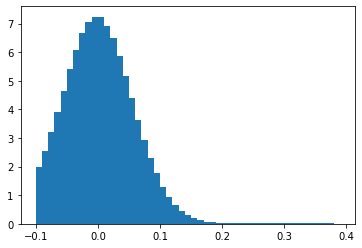

In [10]:
p = plt.hist(ukb_emb.values.ravel(), bins=np.arange(-0.1,0.4,0.01), density=True)

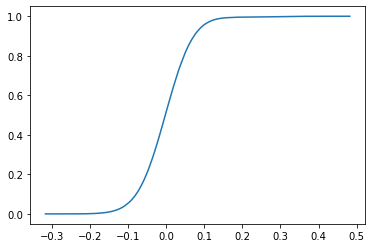

In [11]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [12]:
X2[int(N*0.59)]

0.01106627691851694

In [13]:
len(ukb_emb)

21051

In [14]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [15]:
ukb_positive

dim63     1.000000
dim75     0.984466
dim58     0.949836
dim250    0.906370
dim243    0.859627
            ...   
dim13     0.063085
dim153    0.060567
dim56     0.033918
dim102    0.016056
dim166    0.013254
Length: 256, dtype: float64

In [16]:
ukb_positive[10:50]

dim237    0.776068
dim251    0.768230
dim103    0.755356
dim24     0.750226
dim132    0.730559
dim74     0.724574
dim227    0.717828
dim171    0.716783
dim239    0.710988
dim21     0.710988
dim228    0.707377
dim142    0.702864
dim157    0.694884
dim212    0.691416
dim220    0.691321
dim105    0.685811
dim68     0.678495
dim1      0.674315
dim94     0.673982
dim16     0.670372
dim138    0.667949
dim106    0.659209
dim116    0.650895
dim225    0.647665
dim234    0.640540
dim149    0.637452
dim192    0.630659
dim118    0.625576
dim59     0.625243
dim253    0.623011
dim194    0.619781
dim199    0.619591
dim244    0.616550
dim231    0.613178
dim256    0.611040
dim126    0.608902
dim8      0.607382
dim96     0.604579
dim76     0.604532
dim7      0.604342
dtype: float64

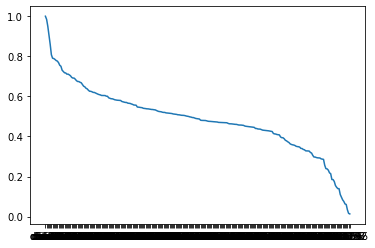

In [17]:
plt.plot(ukb_positive)

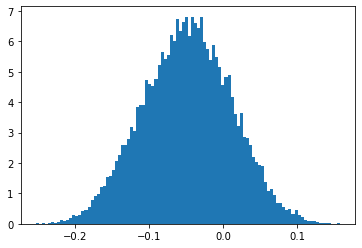

In [18]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

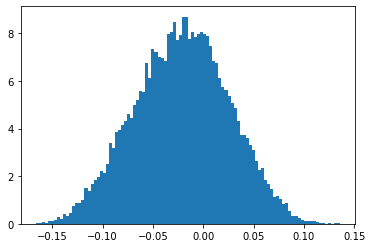

In [19]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

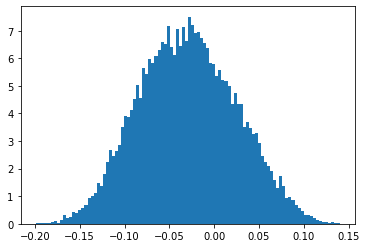

In [20]:
p = plt.hist(ukb_emb.loc[:,"dim188"], bins=100, density=True)

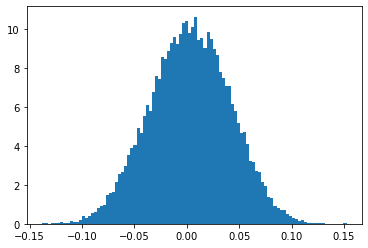

In [21]:
p = plt.hist(ukb_emb.loc[:,"dim10"], bins=100, density=True)

# Schizophrene

In [22]:
norm = schiz_emb.apply(np.linalg.norm, axis=1)
schiz_emb = schiz_emb.div(norm, axis=0)

In [23]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [24]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

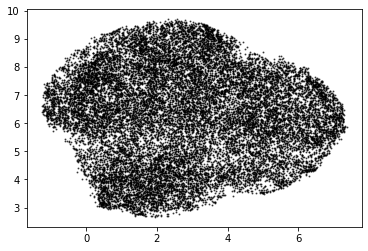

In [25]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [26]:
visual_schiz_emb = reducer.transform(schiz_emb)

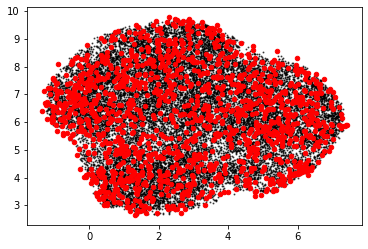

In [27]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)
plt.scatter(visual_schiz_emb[:,0], visual_schiz_emb[:,1], c='red', s=20, alpha=1)

In [28]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)

In [29]:
schiz_order = schiz_emb.copy()
schiz_order.loc["ukb_positive",:] = ukb_positive
schiz_order

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
1,0.099957,0.049203,-0.032188,0.052288,-0.108685,-0.010974,-0.026253,0.035256,-0.001583,0.079561,...,0.109261,-0.014012,0.035840,0.087112,-0.054753,0.032295,0.017862,-0.004285,0.044614,0.062188
10,0.048025,0.041369,-0.046165,0.104907,-0.063700,0.013773,-0.066517,-0.009272,-0.029509,0.050446,...,0.101977,-0.052221,-0.008675,0.020194,-0.028851,-0.001810,0.025105,0.014965,0.009823,0.016474
101,0.045740,0.082551,-0.032791,0.109843,-0.066626,0.007675,-0.098664,0.051791,-0.035023,0.029044,...,0.110625,-0.041929,-0.065502,0.013600,-0.020674,0.005151,0.045655,0.002211,0.028853,0.064569
102,0.002577,-0.030526,-0.016721,-0.016412,0.005155,0.003591,-0.006345,0.046432,-0.049185,0.039802,...,-0.003182,-0.077994,-0.024603,0.116523,-0.014979,0.036488,0.037735,0.068968,-0.052392,0.063798
103,0.079948,-0.007302,-0.005544,-0.065562,0.031359,-0.015810,0.029774,0.053924,-0.048329,0.029513,...,-0.011543,-0.004259,-0.014451,0.012480,0.016487,-0.031979,0.025127,0.057349,-0.116658,0.047353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,0.028813,0.063416,0.026254,0.070780,-0.021630,0.017905,0.002627,0.043192,0.002160,0.020661,...,-0.029951,0.021930,-0.032910,0.114041,0.072859,-0.039589,0.116912,-0.018060,0.129327,0.027960
sub-ye110322_ses-v1,-0.051900,0.010736,-0.003593,-0.053038,0.059945,-0.039809,-0.020942,0.017633,0.048879,0.017694,...,-0.099700,-0.013995,-0.035034,0.105729,0.068958,0.013954,0.042454,0.054950,-0.037591,-0.010801
sub-yh100442_ses-v1,0.018814,0.021833,-0.038689,-0.017712,0.026346,-0.034114,0.027520,-0.016290,-0.120989,-0.036263,...,0.022083,-0.026549,0.010206,0.082735,0.044302,-0.039301,-0.001020,0.061417,-0.100021,0.057145


In [30]:
schiz_order = schiz_order.sort_values(schiz_order.last_valid_index(), ascending=False, axis=1)

In [31]:
schiz_order

,dim63,dim75,dim58,dim250,dim243,dim211,dim187,dim104,dim89,dim134,...,dim81,dim53,dim223,dim229,dim109,dim13,dim153,dim56,dim102,dim166
ID,,,,,,,,,,,,,,,,,,,,,
1,0.421196,0.150200,0.009687,0.087112,0.073078,0.094730,0.011255,0.030541,0.169245,0.121755,...,-0.093056,-0.077724,-0.162308,-0.029492,-0.036925,-0.127546,-0.064400,-0.144705,-0.154366,-0.192997
10,0.435007,0.147890,0.021577,0.020194,0.030863,0.090802,0.016043,-0.034290,0.120211,0.132385,...,-0.136544,-0.063189,-0.096871,-0.053681,-0.119534,-0.119230,0.011362,-0.122508,-0.150165,-0.245028
101,0.422788,0.127077,0.013746,0.013600,0.030858,0.096610,0.005847,-0.045815,0.144295,0.156679,...,-0.134108,-0.065099,-0.080163,-0.061965,-0.103906,-0.081262,0.003196,-0.178376,-0.111790,-0.227001
102,0.422637,0.036601,0.099339,0.116523,0.055318,-0.003193,0.050274,0.036934,0.018137,0.032472,...,-0.059731,-0.102153,-0.131690,-0.143136,-0.084078,-0.072844,-0.098897,-0.093426,-0.126083,-0.245863
103,0.354800,0.051391,0.128531,0.012480,0.052806,0.074570,0.007009,0.009445,0.099159,0.049849,...,-0.023587,-0.040733,-0.063131,-0.107771,-0.073636,-0.018020,-0.181049,-0.169976,-0.082767,-0.143772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,0.319331,0.191929,0.038267,0.114041,0.035221,0.060521,0.071404,0.159302,0.011696,0.091013,...,-0.070478,-0.153349,-0.124503,-0.085587,-0.030638,-0.147573,-0.022419,-0.129660,-0.130599,-0.138186
sub-ye110322_ses-v1,0.326235,0.112386,0.112958,0.105729,0.060768,0.055616,-0.051532,0.039686,0.032781,0.034138,...,0.029607,-0.166309,-0.041362,-0.096164,-0.087344,-0.178165,-0.108205,-0.054987,-0.087259,-0.191105
sub-yh100442_ses-v1,0.317951,0.089264,0.097596,0.082735,0.055521,0.049085,0.094730,-0.030816,0.010980,0.032349,...,-0.063375,-0.025669,0.015485,-0.168323,-0.148726,-0.057009,-0.092401,-0.152882,-0.146939,-0.175277


# Fit on schiz datasets

In [32]:
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
1,0.099957,0.049203,-0.032188,0.052288,-0.108685,-0.010974,-0.026253,0.035256,-0.001583,0.079561,...,0.109261,-0.014012,0.035840,0.087112,-0.054753,0.032295,0.017862,-0.004285,0.044614,0.062188
10,0.048025,0.041369,-0.046165,0.104907,-0.063700,0.013773,-0.066517,-0.009272,-0.029509,0.050446,...,0.101977,-0.052221,-0.008675,0.020194,-0.028851,-0.001810,0.025105,0.014965,0.009823,0.016474
101,0.045740,0.082551,-0.032791,0.109843,-0.066626,0.007675,-0.098664,0.051791,-0.035023,0.029044,...,0.110625,-0.041929,-0.065502,0.013600,-0.020674,0.005151,0.045655,0.002211,0.028853,0.064569
102,0.002577,-0.030526,-0.016721,-0.016412,0.005155,0.003591,-0.006345,0.046432,-0.049185,0.039802,...,-0.003182,-0.077994,-0.024603,0.116523,-0.014979,0.036488,0.037735,0.068968,-0.052392,0.063798
103,0.079948,-0.007302,-0.005544,-0.065562,0.031359,-0.015810,0.029774,0.053924,-0.048329,0.029513,...,-0.011543,-0.004259,-0.014451,0.012480,0.016487,-0.031979,0.025127,0.057349,-0.116658,0.047353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-st110288_ses-v1,-0.051209,-0.023640,-0.005640,0.038094,0.001237,0.068000,-0.017905,0.076194,-0.162869,0.012086,...,-0.017713,-0.013522,-0.013884,0.107287,0.154034,-0.086945,-0.022718,0.026284,-0.030762,-0.004873
sub-va110289_ses-v1,0.028813,0.063416,0.026254,0.070780,-0.021630,0.017905,0.002627,0.043192,0.002160,0.020661,...,-0.029951,0.021930,-0.032910,0.114041,0.072859,-0.039589,0.116912,-0.018060,0.129327,0.027960
sub-ye110322_ses-v1,-0.051900,0.010736,-0.003593,-0.053038,0.059945,-0.039809,-0.020942,0.017633,0.048879,0.017694,...,-0.099700,-0.013995,-0.035034,0.105729,0.068958,0.013954,0.042454,0.054950,-0.037591,-0.010801


In [33]:
schiz_all = pd.merge(schiz_label, schiz_emb, left_index=True, right_index=True)

In [34]:
schiz_precatatoes = schiz_all[schiz_all.study=="PreCatatoes"]

In [35]:
d = {'control': 0, "schizophrenia": 1}
train = schiz_all.loc[schiz_all.index.isin(schiz_train[0]),:]
y_train = train['diagnosis'].map(d)
X_train = train.iloc[:, 5:]
val = schiz_all.loc[schiz_all.index.isin(schiz_val[0]),:]
y_val = val['diagnosis'].map(d)
X_val = val.iloc[:, 5:]
test_intra = schiz_all.loc[schiz_all.index.isin(schiz_test_intra[0]),:]
y_test_intra = test_intra['diagnosis'].map(d)
X_test_intra = test_intra.iloc[:, 5:]
test = schiz_all.loc[schiz_all.index.isin(schiz_test[0]),:]
y_test = test['diagnosis'].map(d)
X_test = test.iloc[:, 5:]

In [36]:
train

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
sub-INV07WT2ZL3,M,29,control,BSNIP,Dallas,0.094155,-0.083140,-0.096231,-0.054828,0.012068,...,0.021840,0.004629,0.018382,-0.038047,0.041051,-0.103391,-0.007919,0.062279,-0.050609,0.046740
sub-INV0AL14J6U,M,43,schizophrenia,BSNIP,Dallas,0.055233,0.041508,-0.005253,0.101384,0.002161,...,-0.000955,-0.021740,-0.043298,0.016048,0.056708,0.074175,0.060741,-0.033365,-0.071661,-0.021677
sub-INV14XK7P6E,M,30,control,BSNIP,Dallas,0.049545,-0.017136,-0.014449,0.028856,-0.033893,...,0.014242,-0.054479,0.012169,0.093123,0.028725,-0.029364,0.036391,-0.049188,0.014204,-0.015183
sub-INV23XFB3ZA,M,25,schizophrenia,BSNIP,Dallas,-0.036854,-0.020941,0.057912,-0.067096,0.089948,...,0.001705,0.001013,-0.056063,0.053081,0.021549,-0.019773,0.039030,0.026500,0.023871,0.059267
sub-INV25C66ABC,F,49,schizophrenia,BSNIP,Dallas,-0.027976,0.041677,0.018002,-0.020708,0.017277,...,-0.094437,-0.014268,-0.034101,0.058443,0.087968,0.069893,0.077232,0.013700,0.029701,0.043489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10090_ses-v1,M,20,control,PRAGUE,PRAGUE,0.066552,-0.007292,-0.014263,-0.051237,0.029562,...,0.012000,0.070677,0.090280,0.072698,0.023802,-0.060300,-0.021098,0.030013,-0.052879,-0.023800
sub-ESOC10060_ses-v1,F,26,control,PRAGUE,PRAGUE,0.041583,-0.032205,0.054214,0.050950,-0.055759,...,-0.067662,-0.023136,-0.109200,0.057086,0.131628,-0.044639,0.090156,0.030110,0.063771,-0.026604
sub-ESOC10019_ses-v1,F,28,control,PRAGUE,PRAGUE,0.151502,0.038452,0.004694,0.099697,-0.129291,...,0.101347,-0.063013,0.015831,0.034359,0.006693,-0.013058,0.021489,0.073573,-0.017398,0.039216
sub-ESOC10063_ses-v1,M,31,control,PRAGUE,PRAGUE,0.012659,-0.028445,-0.067467,-0.012219,0.019521,...,-0.047285,-0.011020,0.038302,0.034235,0.116265,-0.040328,0.042379,0.117682,-0.019771,-0.009014


In [37]:
X_train.shape

(903, 256)

In [38]:
bst = XGBClassifier(max_depth=1, min_child_weight=5, alpha=1, learning_rate=0.001, objective='binary:logistic')

In [39]:
X_train.shape

(903, 256)

In [40]:
y_train.shape

(903,)

In [41]:
bst.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [42]:
roc_auc_score(y_train, bst.predict_proba(X_train)[:,1])

0.6197484340785252

In [43]:
roc_auc_score(y_val, bst.predict_proba(X_val)[:,1])

0.48218954248366014

In [44]:
roc_auc_score(y_test_intra, bst.predict_proba(X_test_intra)[:,1])

0.5679738562091503

In [45]:
roc_auc_score(y_test, bst.predict_proba(X_test)[:,1])

0.466683058765675

In [46]:
param_grid = {
    'max_depth': [1],
    'learning_rate': [0.0001],
    'subsample': [0.2]
}

In [47]:
split_index = [-1]*len(X_train) + [0]*len(X_val)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
pds = PredefinedSplit(test_fold = split_index)

In [48]:
X.shape

(1016, 256)

In [49]:
# Grid-search all parameter combinations using a validation set.
opt = GridSearchCV(estimator = XGBClassifier(objective='binary:logistic'), cv=pds, param_grid = param_grid)
opt.fit(X, y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.0001], 'max_depth': [1],
                         'subsample': [0.2]})

In [50]:
roc_auc_score(y_train, opt.best_estimator_.predict_proba(X_train)[:,1])

0.6469521821052096

In [51]:
roc_auc_score(y_val, opt.best_estimator_.predict_proba(X_val)[:,1])

0.6228758169934641

In [52]:
roc_auc_score(y_test_intra, opt.best_estimator_.predict_proba(X_test_intra)[:,1])

0.5251633986928105

In [53]:
roc_auc_score(y_test, opt.best_estimator_.predict_proba(X_test)[:,1])

0.4915170887632161

In [54]:
opt.best_params_

{'learning_rate': 0.0001, 'max_depth': 1, 'subsample': 0.2}

# UMAP

In [55]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,0.005548,-0.064089,-0.026022,-0.041517,0.052634,-0.029911,0.044748,0.004402,-0.078479,0.046025,...,-0.002897,-0.050269,0.041998,0.102671,0.003912,0.060539,-0.023275,0.063517,-0.159140,-0.035354
sub-1000458,-0.015734,0.052264,0.014216,-0.106229,0.075110,-0.066444,0.080108,0.022229,-0.053829,0.006584,...,-0.026098,0.023587,-0.002161,0.082018,-0.004958,-0.012071,-0.013712,-0.006930,-0.114527,0.085662
sub-1000575,0.043086,-0.002277,-0.071244,-0.029378,0.059849,-0.008174,0.054023,0.112071,0.087840,0.029931,...,-0.046515,0.036348,0.004526,0.024251,0.019829,0.022743,-0.015511,-0.115157,0.016564,-0.015130
sub-1000606,0.146132,0.020161,0.033441,0.040605,-0.136454,0.022340,-0.014488,0.072865,-0.022559,0.032357,...,-0.040657,0.017740,-0.014340,0.056403,0.061436,-0.007395,0.114350,0.040103,0.035420,0.105209
sub-1000963,0.146964,0.027271,0.115320,-0.099405,-0.004046,-0.073625,0.049552,0.001662,-0.019786,0.033034,...,-0.012712,0.084064,0.059500,0.058896,0.004838,0.042913,0.029317,0.024667,-0.063521,0.010358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,0.055530,-0.010076,0.054154,0.053461,-0.006573,0.026134,0.026622,0.016113,-0.023623,-0.009624,...,-0.012212,0.024405,0.005365,0.091865,0.069941,0.025631,0.016385,-0.055737,0.032033,-0.108291
sub-6023808,0.008517,-0.040052,-0.038796,0.005800,0.012509,0.011637,0.044943,-0.034772,0.007018,-0.024630,...,-0.078089,0.015174,0.011657,0.084209,0.109577,-0.072469,-0.011025,-0.025894,-0.017657,-0.039207
sub-6023847,0.086109,0.005616,-0.041003,0.017872,0.004042,0.021186,0.055911,0.025977,-0.080430,0.046439,...,-0.001743,0.013984,0.008949,0.169870,-0.009317,0.019001,0.035070,-0.006406,-0.030505,0.011755


In [56]:
train

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
sub-INV07WT2ZL3,M,29,control,BSNIP,Dallas,0.094155,-0.083140,-0.096231,-0.054828,0.012068,...,0.021840,0.004629,0.018382,-0.038047,0.041051,-0.103391,-0.007919,0.062279,-0.050609,0.046740
sub-INV0AL14J6U,M,43,schizophrenia,BSNIP,Dallas,0.055233,0.041508,-0.005253,0.101384,0.002161,...,-0.000955,-0.021740,-0.043298,0.016048,0.056708,0.074175,0.060741,-0.033365,-0.071661,-0.021677
sub-INV14XK7P6E,M,30,control,BSNIP,Dallas,0.049545,-0.017136,-0.014449,0.028856,-0.033893,...,0.014242,-0.054479,0.012169,0.093123,0.028725,-0.029364,0.036391,-0.049188,0.014204,-0.015183
sub-INV23XFB3ZA,M,25,schizophrenia,BSNIP,Dallas,-0.036854,-0.020941,0.057912,-0.067096,0.089948,...,0.001705,0.001013,-0.056063,0.053081,0.021549,-0.019773,0.039030,0.026500,0.023871,0.059267
sub-INV25C66ABC,F,49,schizophrenia,BSNIP,Dallas,-0.027976,0.041677,0.018002,-0.020708,0.017277,...,-0.094437,-0.014268,-0.034101,0.058443,0.087968,0.069893,0.077232,0.013700,0.029701,0.043489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10090_ses-v1,M,20,control,PRAGUE,PRAGUE,0.066552,-0.007292,-0.014263,-0.051237,0.029562,...,0.012000,0.070677,0.090280,0.072698,0.023802,-0.060300,-0.021098,0.030013,-0.052879,-0.023800
sub-ESOC10060_ses-v1,F,26,control,PRAGUE,PRAGUE,0.041583,-0.032205,0.054214,0.050950,-0.055759,...,-0.067662,-0.023136,-0.109200,0.057086,0.131628,-0.044639,0.090156,0.030110,0.063771,-0.026604
sub-ESOC10019_ses-v1,F,28,control,PRAGUE,PRAGUE,0.151502,0.038452,0.004694,0.099697,-0.129291,...,0.101347,-0.063013,0.015831,0.034359,0.006693,-0.013058,0.021489,0.073573,-0.017398,0.039216
sub-ESOC10063_ses-v1,M,31,control,PRAGUE,PRAGUE,0.012659,-0.028445,-0.067467,-0.012219,0.019521,...,-0.047285,-0.011020,0.038302,0.034235,0.116265,-0.040328,0.042379,0.117682,-0.019771,-0.009014


In [57]:
train.iloc[:,5:]

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
sub-INV07WT2ZL3,0.094155,-0.083140,-0.096231,-0.054828,0.012068,0.005968,0.015954,-0.015416,0.023375,0.053431,...,0.021840,0.004629,0.018382,-0.038047,0.041051,-0.103391,-0.007919,0.062279,-0.050609,0.046740
sub-INV0AL14J6U,0.055233,0.041508,-0.005253,0.101384,0.002161,-0.005623,-0.019732,0.076303,-0.079648,0.003388,...,-0.000955,-0.021740,-0.043298,0.016048,0.056708,0.074175,0.060741,-0.033365,-0.071661,-0.021677
sub-INV14XK7P6E,0.049545,-0.017136,-0.014449,0.028856,-0.033893,0.016460,0.097598,0.016164,-0.059955,-0.036877,...,0.014242,-0.054479,0.012169,0.093123,0.028725,-0.029364,0.036391,-0.049188,0.014204,-0.015183
sub-INV23XFB3ZA,-0.036854,-0.020941,0.057912,-0.067096,0.089948,-0.013391,0.028900,0.060550,-0.042115,0.010277,...,0.001705,0.001013,-0.056063,0.053081,0.021549,-0.019773,0.039030,0.026500,0.023871,0.059267
sub-INV25C66ABC,-0.027976,0.041677,0.018002,-0.020708,0.017277,-0.040904,-0.066852,0.131656,0.035354,0.048283,...,-0.094437,-0.014268,-0.034101,0.058443,0.087968,0.069893,0.077232,0.013700,0.029701,0.043489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10090_ses-v1,0.066552,-0.007292,-0.014263,-0.051237,0.029562,-0.035667,0.074803,-0.036687,-0.008589,0.103868,...,0.012000,0.070677,0.090280,0.072698,0.023802,-0.060300,-0.021098,0.030013,-0.052879,-0.023800
sub-ESOC10060_ses-v1,0.041583,-0.032205,0.054214,0.050950,-0.055759,0.090670,-0.066015,0.157299,-0.044802,0.006761,...,-0.067662,-0.023136,-0.109200,0.057086,0.131628,-0.044639,0.090156,0.030110,0.063771,-0.026604
sub-ESOC10019_ses-v1,0.151502,0.038452,0.004694,0.099697,-0.129291,-0.034035,-0.071922,-0.033495,-0.050544,-0.048129,...,0.101347,-0.063013,0.015831,0.034359,0.006693,-0.013058,0.021489,0.073573,-0.017398,0.039216
sub-ESOC10063_ses-v1,0.012659,-0.028445,-0.067467,-0.012219,0.019521,-0.059344,-0.072505,-0.056301,0.068381,0.017608,...,-0.047285,-0.011020,0.038302,0.034235,0.116265,-0.040328,0.042379,0.117682,-0.019771,-0.009014


In [58]:
schiz_precatatoes

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
1,M,63,schizophrenia,PreCatatoes,Sainte-Anne,0.099957,0.049203,-0.032188,0.052288,-0.108685,...,0.109261,-0.014012,0.035840,0.087112,-0.054753,0.032295,0.017862,-0.004285,0.044614,0.062188
2,M,45,schizophrenia,PreCatatoes,Sainte-Anne,0.048025,0.041369,-0.046165,0.104907,-0.063700,...,0.101977,-0.052221,-0.008675,0.020194,-0.028851,-0.001810,0.025105,0.014965,0.009823,0.016474
3,M,26,schizophrenia,PreCatatoes,Sainte-Anne,0.032540,0.034327,-0.057539,0.074780,-0.005681,...,0.094623,-0.031719,-0.040402,0.043110,-0.024445,-0.005405,0.037319,0.032117,-0.030197,0.036620
4,F,68,schizophrenia,PreCatatoes,Sainte-Anne,0.044825,0.037952,-0.041105,0.106311,-0.068437,...,0.099386,-0.054773,-0.013702,0.019763,-0.018722,-0.003558,0.018832,0.011034,0.025860,0.012490
5,F,48,schizophrenia,PreCatatoes,Sainte-Anne,0.048025,0.041369,-0.046165,0.104907,-0.063700,...,0.101977,-0.052221,-0.008675,0.020194,-0.028851,-0.001810,0.025105,0.014965,0.009823,0.016474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,M,53,schizophrenia,PreCatatoes,Sainte-Anne,0.052611,0.083778,-0.020930,0.122523,-0.051065,...,0.086972,-0.027205,-0.089801,-0.018248,0.001079,-0.007961,0.052202,0.028694,0.000264,0.051126
183,F,19,schizophrenia,PreCatatoes,Sainte-Anne,0.002784,0.036559,0.050798,-0.051681,0.083514,...,-0.051907,0.046370,-0.049831,0.007944,0.021471,-0.095661,0.019650,-0.018008,0.035667,0.051770
184,M,26,control,PreCatatoes,Sainte-Anne,0.030745,-0.072924,0.067893,-0.138666,0.028335,...,-0.073252,0.030026,-0.006137,0.094866,0.076265,-0.002342,0.009551,0.025170,-0.033584,-0.004767
185,M,29,schizophrenia,PreCatatoes,Sainte-Anne,-0.027857,0.034543,0.010328,0.042936,0.043997,...,0.071947,-0.053146,-0.112012,0.031053,-0.028814,-0.047155,0.033399,0.000352,0.024057,0.068554


In [59]:
reducer = UMAP()
umap_ukb = reducer.fit_transform(ukb_emb)

In [60]:
umap_schiz = reducer.transform(train.iloc[:, 5:])

In [61]:
umap_precatatoes = reducer.transform(schiz_precatatoes.iloc[:, 5:])

In [62]:
umap_ukb.shape

(21051, 2)

In [63]:
cmap = {'control':'b', 'schizophrenia':'r'}
colors = [cmap[diag] for diag in train.diagnosis]
colors_precatatoes = [cmap[diag] for diag in schiz_precatatoes.diagnosis]

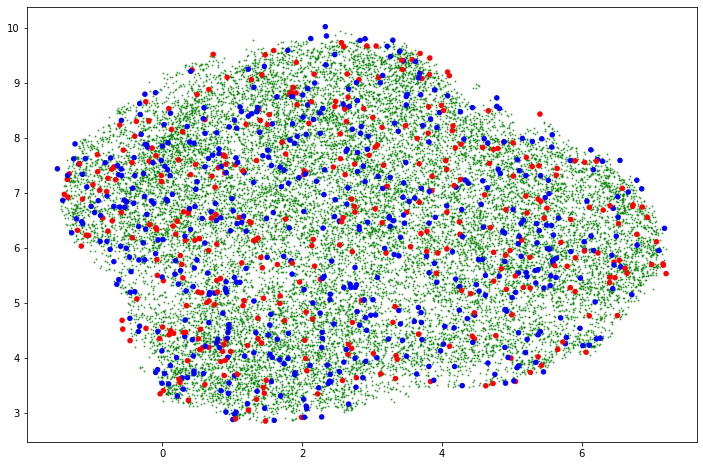

In [64]:
plt.figure(figsize=(12,8))
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=1, c='green', alpha=0.6)
plt.scatter(umap_schiz[:,0], umap_schiz[:,1], s=20, c=colors, alpha=1)
plt.show()

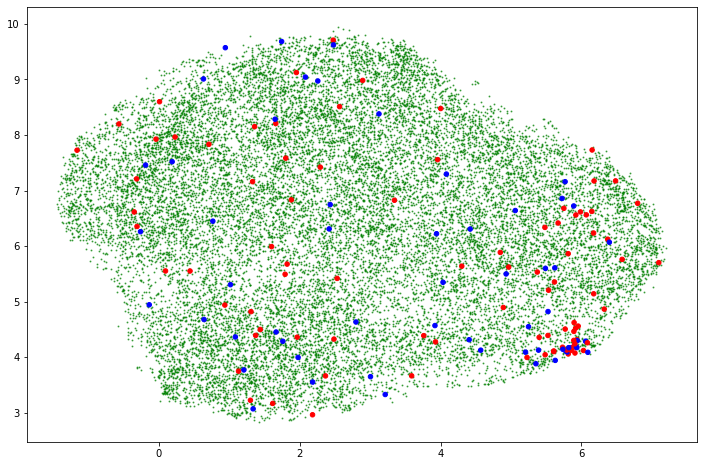

In [65]:
plt.figure(figsize=(12,8))
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=1, c='green', alpha=0.6)
plt.scatter(umap_precatatoes[:,0], umap_precatatoes[:,1], s=20, c=colors_precatatoes, alpha=1)
plt.show()

In [66]:
precatatoes_labels = pd.read_csv(precatatoes_file, dtype={'participant_id':str})[["participant_id", "catatonie"]]
precatatoes_labels.set_index("participant_id", inplace=True)

In [85]:
precatatoes_all = pd.read_csv(precatatoes_file, dtype={'participant_id':str})[['participant_id', 'type_OFC_G']]
precatatoes_all.set_index("participant_id", inplace=True)
precatatoes_all

,type_OFC_G
participant_id,
1,III
2,III
3,I
4,II
5,III
...,...
182,III
183,III
184,I


In [67]:
precatatoes_labels.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '176', '178', '179', '180', '181', '182', '183', '184', '185', '186'],
      dtype='object', name='participant_id', length=162)

In [68]:
schiz_precatatoes.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '175', '176', '178', '179', '181', '182', '183', '184', '185', '186'],
      dtype='object', length=150)

In [69]:
schiz_precatatoes_cat = pd.merge(precatatoes_labels, schiz_precatatoes, left_index=True, right_index=True)

In [87]:
schiz_precatatoes_pattern = pd.merge(precatatoes_all, schiz_precatatoes, left_index=True, right_index=True)
schiz_precatatoes_pattern

,type_OFC_G,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
1,III,M,63,schizophrenia,PreCatatoes,Sainte-Anne,0.099957,0.049203,-0.032188,0.052288,...,0.109261,-0.014012,0.035840,0.087112,-0.054753,0.032295,0.017862,-0.004285,0.044614,0.062188
2,III,M,45,schizophrenia,PreCatatoes,Sainte-Anne,0.048025,0.041369,-0.046165,0.104907,...,0.101977,-0.052221,-0.008675,0.020194,-0.028851,-0.001810,0.025105,0.014965,0.009823,0.016474
3,I,M,26,schizophrenia,PreCatatoes,Sainte-Anne,0.032540,0.034327,-0.057539,0.074780,...,0.094623,-0.031719,-0.040402,0.043110,-0.024445,-0.005405,0.037319,0.032117,-0.030197,0.036620
4,II,F,68,schizophrenia,PreCatatoes,Sainte-Anne,0.044825,0.037952,-0.041105,0.106311,...,0.099386,-0.054773,-0.013702,0.019763,-0.018722,-0.003558,0.018832,0.011034,0.025860,0.012490
5,III,F,48,schizophrenia,PreCatatoes,Sainte-Anne,0.048025,0.041369,-0.046165,0.104907,...,0.101977,-0.052221,-0.008675,0.020194,-0.028851,-0.001810,0.025105,0.014965,0.009823,0.016474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,III,M,53,schizophrenia,PreCatatoes,Sainte-Anne,0.052611,0.083778,-0.020930,0.122523,...,0.086972,-0.027205,-0.089801,-0.018248,0.001079,-0.007961,0.052202,0.028694,0.000264,0.051126
183,III,F,19,schizophrenia,PreCatatoes,Sainte-Anne,0.002784,0.036559,0.050798,-0.051681,...,-0.051907,0.046370,-0.049831,0.007944,0.021471,-0.095661,0.019650,-0.018008,0.035667,0.051770
184,I,M,26,control,PreCatatoes,Sainte-Anne,0.030745,-0.072924,0.067893,-0.138666,...,-0.073252,0.030026,-0.006137,0.094866,0.076265,-0.002342,0.009551,0.025170,-0.033584,-0.004767
185,I,M,29,schizophrenia,PreCatatoes,Sainte-Anne,-0.027857,0.034543,0.010328,0.042936,...,0.071947,-0.053146,-0.112012,0.031053,-0.028814,-0.047155,0.033399,0.000352,0.024057,0.068554


In [70]:
schiz_precatatoes_cat = schiz_precatatoes_cat[schiz_precatatoes_cat.diagnosis=="schizophrenia"]

In [71]:
schiz_precatatoes_cat

,catatonie,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
1,oui,M,63,schizophrenia,PreCatatoes,Sainte-Anne,0.099957,0.049203,-0.032188,0.052288,...,0.109261,-0.014012,0.035840,0.087112,-0.054753,0.032295,0.017862,-0.004285,0.044614,0.062188
2,oui,M,45,schizophrenia,PreCatatoes,Sainte-Anne,0.048025,0.041369,-0.046165,0.104907,...,0.101977,-0.052221,-0.008675,0.020194,-0.028851,-0.001810,0.025105,0.014965,0.009823,0.016474
3,non,M,26,schizophrenia,PreCatatoes,Sainte-Anne,0.032540,0.034327,-0.057539,0.074780,...,0.094623,-0.031719,-0.040402,0.043110,-0.024445,-0.005405,0.037319,0.032117,-0.030197,0.036620
4,non,F,68,schizophrenia,PreCatatoes,Sainte-Anne,0.044825,0.037952,-0.041105,0.106311,...,0.099386,-0.054773,-0.013702,0.019763,-0.018722,-0.003558,0.018832,0.011034,0.025860,0.012490
5,oui,F,48,schizophrenia,PreCatatoes,Sainte-Anne,0.048025,0.041369,-0.046165,0.104907,...,0.101977,-0.052221,-0.008675,0.020194,-0.028851,-0.001810,0.025105,0.014965,0.009823,0.016474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,non,M,57,schizophrenia,PreCatatoes,Sainte-Anne,-0.011370,0.048638,0.062084,0.109113,...,0.040719,0.003162,-0.145551,0.021853,0.022096,-0.040518,0.040327,-0.022507,0.046860,-0.024485
182,non,M,53,schizophrenia,PreCatatoes,Sainte-Anne,0.052611,0.083778,-0.020930,0.122523,...,0.086972,-0.027205,-0.089801,-0.018248,0.001079,-0.007961,0.052202,0.028694,0.000264,0.051126
183,non,F,19,schizophrenia,PreCatatoes,Sainte-Anne,0.002784,0.036559,0.050798,-0.051681,...,-0.051907,0.046370,-0.049831,0.007944,0.021471,-0.095661,0.019650,-0.018008,0.035667,0.051770
185,oui,M,29,schizophrenia,PreCatatoes,Sainte-Anne,-0.027857,0.034543,0.010328,0.042936,...,0.071947,-0.053146,-0.112012,0.031053,-0.028814,-0.047155,0.033399,0.000352,0.024057,0.068554


In [72]:
cmap = {'non':'b', 'oui':'r'}
colors_catatonie = [cmap[diag] for diag in schiz_precatatoes_cat.catatonie]

In [73]:
umap_cat = reducer.transform(schiz_precatatoes_cat.iloc[:, 6:])

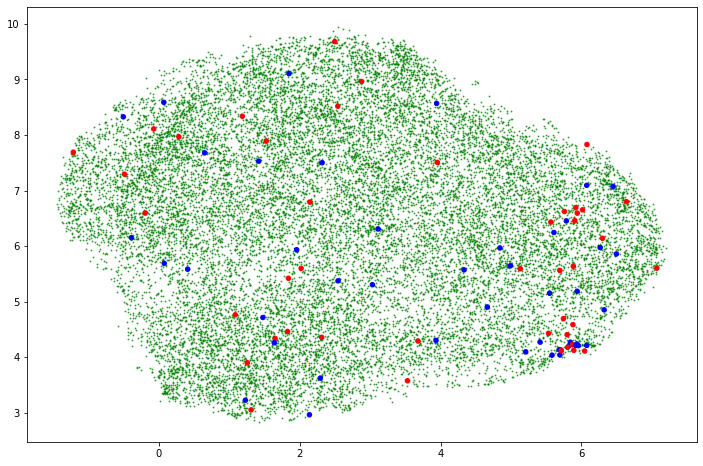

In [74]:
plt.figure(figsize=(12,8))
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=1, c='green', alpha=0.6)
plt.scatter(umap_cat[:,0], umap_cat[:,1], s=20, c=colors_catatonie, alpha=1)
plt.show()

In [98]:
schiz_precatatoes_pattern.iloc[:, 6:]

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
1,0.099957,0.049203,-0.032188,0.052288,-0.108685,-0.010974,-0.026253,0.035256,-0.001583,0.079561,...,0.109261,-0.014012,0.035840,0.087112,-0.054753,0.032295,0.017862,-0.004285,0.044614,0.062188
2,0.048025,0.041369,-0.046165,0.104907,-0.063700,0.013773,-0.066517,-0.009272,-0.029509,0.050446,...,0.101977,-0.052221,-0.008675,0.020194,-0.028851,-0.001810,0.025105,0.014965,0.009823,0.016474
3,0.032540,0.034327,-0.057539,0.074780,-0.005681,-0.001960,-0.033341,-0.005849,-0.061945,0.050249,...,0.094623,-0.031719,-0.040402,0.043110,-0.024445,-0.005405,0.037319,0.032117,-0.030197,0.036620
4,0.044825,0.037952,-0.041105,0.106311,-0.068437,0.019419,-0.078229,0.000598,-0.017347,0.040842,...,0.099386,-0.054773,-0.013702,0.019763,-0.018722,-0.003558,0.018832,0.011034,0.025860,0.012490
5,0.048025,0.041369,-0.046165,0.104907,-0.063700,0.013773,-0.066517,-0.009272,-0.029509,0.050446,...,0.101977,-0.052221,-0.008675,0.020194,-0.028851,-0.001810,0.025105,0.014965,0.009823,0.016474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.052611,0.083778,-0.020930,0.122523,-0.051065,0.019342,-0.140568,0.067388,-0.043329,0.041673,...,0.086972,-0.027205,-0.089801,-0.018248,0.001079,-0.007961,0.052202,0.028694,0.000264,0.051126
183,0.002784,0.036559,0.050798,-0.051681,0.083514,-0.030022,0.023483,-0.031025,0.092657,-0.042681,...,-0.051907,0.046370,-0.049831,0.007944,0.021471,-0.095661,0.019650,-0.018008,0.035667,0.051770
184,0.030745,-0.072924,0.067893,-0.138666,0.028335,-0.032225,0.062686,0.042786,0.000594,-0.035517,...,-0.073252,0.030026,-0.006137,0.094866,0.076265,-0.002342,0.009551,0.025170,-0.033584,-0.004767
185,-0.027857,0.034543,0.010328,0.042936,0.043997,0.036612,-0.040701,0.042308,-0.073611,0.009103,...,0.071947,-0.053146,-0.112012,0.031053,-0.028814,-0.047155,0.033399,0.000352,0.024057,0.068554


In [119]:
reducer_cat = UMAP()
reducer_cat.fit(schiz_precatatoes_pattern.iloc[:, 6:])
umap_cat2 = reducer_cat.transform(schiz_precatatoes_cat.iloc[:, 6:])
umap_pat2 = reducer_cat.transform(schiz_precatatoes_pattern.iloc[:, 6:])

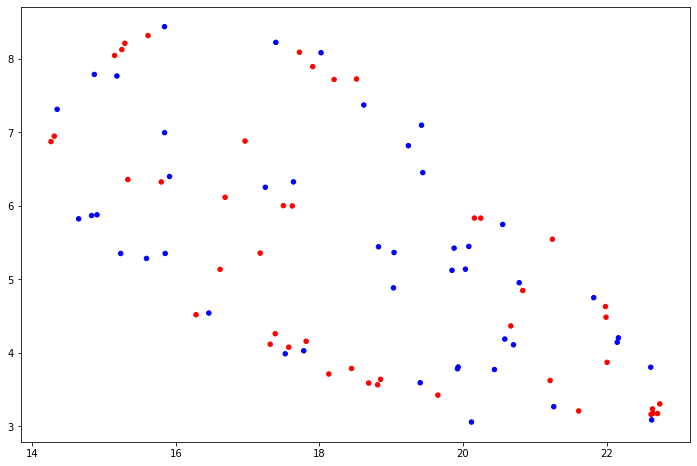

In [120]:
plt.figure(figsize=(12,8))
plt.scatter(umap_cat2[:,0], umap_cat2[:,1], s=20, c=colors_catatonie, alpha=1)
plt.show()

In [121]:
len(umap_cat2)

89

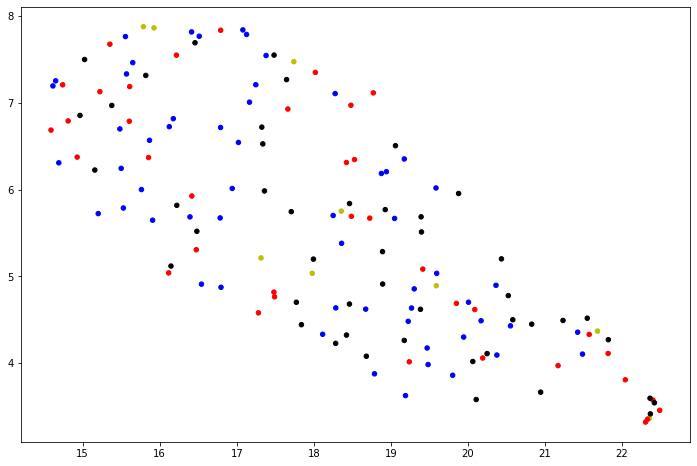

In [128]:
plt.figure(figsize=(12,8))
cmap = {'I':'b', 'II':'black', 'III': 'r', 'IV': 'y'}
colors_pattern = [cmap[diag] for diag in schiz_precatatoes_pattern.type_OFC_G]
plt.scatter(umap_pat2[:,0], umap_pat2[:,1], s=20, c=colors_pattern, alpha=1)
plt.show()

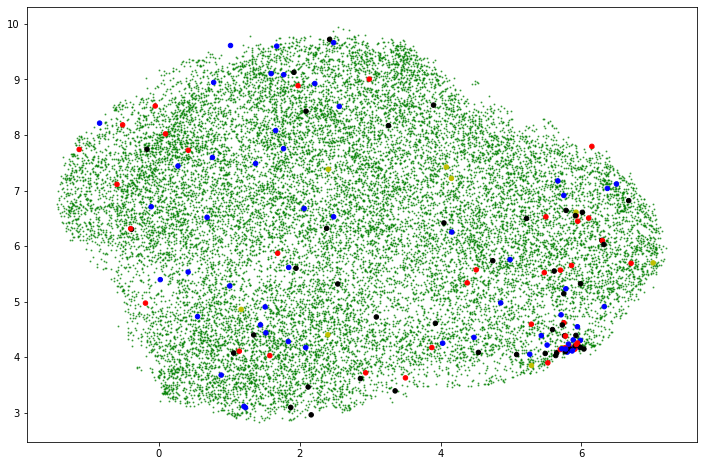

In [127]:
plt.figure(figsize=(12,8))
cmap = {'I':'b', 'II':'black', 'III': 'r', 'IV': 'y'}
umap_pat = reducer.transform(schiz_precatatoes_pattern.iloc[:, 6:])
colors_pattern = [cmap[diag] for diag in schiz_precatatoes_pattern.type_OFC_G]
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=1, c='green', alpha=0.6)
plt.scatter(umap_pat[:,0], umap_pat[:,1], s=20, c=colors_pattern, alpha=1)
plt.show()

In [113]:
classifier = SVC(kernel='linear', probability=True,
        max_iter=-1,
        C=0.01, class_weight='balanced', decision_function_shape='ovr')
classifier.fit(schiz_precatatoes_cat.iloc[:, 6:], schiz_precatatoes_cat.iloc[:, 0])

# cross_val_score(classifier, schiz_precatatoes_cat.iloc[:, 6:], schiz_precatatoes_cat.iloc[:, 0], cv=5)

SVC(C=0.01, class_weight='balanced', kernel='linear', probability=True)

In [78]:
roc_auc_score(schiz_precatatoes_cat.iloc[:, 0], classifier.predict_proba(schiz_precatatoes_cat.iloc[:, 6:])[:,0])

0.7381313131313132

In [79]:
cross_val_score(classifier,
                schiz_precatatoes_cat.iloc[:, 6:],
                schiz_precatatoes_cat.iloc[:, 0].map({"non": 0, "oui": 1}),
                scoring='roc_auc', cv=5)

array([0.36419753, 0.65432099, 0.61728395, 0.62962963, 0.68055556])

In [80]:
schiz_precatatoes_cat.iloc[:, 0].map({"non": 0, "oui": 1})

1      1
2      1
3      0
4      0
5      1
      ..
171    0
182    0
183    0
185    1
186    1
Name: catatonie, Length: 89, dtype: int64